# 統計学入門

* 黒木玄
* 2022-08-28
$
\newcommand\R{\mathbb{R}}
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\var{\op{var}}
\newcommand\wald{\op{Wald}}
\newcommand\wilson{\op{Wilson}}
\newcommand\pdf{\op{pdf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ccdf{\op{ccdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Normal{\op{Normal}}
\newcommand\phat{\hat{p}}
$

このノートブックで用いた[Julia言語](https://julialang.org/)の使い方については以下の資料が参考になるだろう:

* https://nbviewer.org/github/genkuroki/msfd28/blob/master/msfd28genkuroki.ipynb
* https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#はじめに" data-toc-modified-id="はじめに-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>はじめに</a></span><ul class="toc-item"><li><span><a href="#この解説の動機" data-toc-modified-id="この解説の動機-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>この解説の動機</a></span></li><li><span><a href="#基本文献と動画の紹介" data-toc-modified-id="基本文献と動画の紹介-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>基本文献と動画の紹介</a></span></li></ul></li><li><span><a href="#二項分布と正規分布" data-toc-modified-id="二項分布と正規分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>二項分布と正規分布</a></span><ul class="toc-item"><li><span><a href="#二項分布" data-toc-modified-id="二項分布-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>二項分布</a></span></li><li><span><a href="#二項分布に関する問題" data-toc-modified-id="二項分布に関する問題-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>二項分布に関する問題</a></span></li><li><span><a href="#二項分布に関する問題の解答例" data-toc-modified-id="二項分布に関する問題の解答例-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>二項分布に関する問題の解答例</a></span><ul class="toc-item"><li><span><a href="#二項分布に関する問題の解答例(1)" data-toc-modified-id="二項分布に関する問題の解答例(1)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>二項分布に関する問題の解答例(1)</a></span></li><li><span><a href="#二項分布に関する問題の解答例(2)" data-toc-modified-id="二項分布に関する問題の解答例(2)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>二項分布に関する問題の解答例(2)</a></span></li><li><span><a href="#二項分布に関する問題の解答例(3)" data-toc-modified-id="二項分布に関する問題の解答例(3)-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>二項分布に関する問題の解答例(3)</a></span></li><li><span><a href="#二項分布に関する問題の解答例(4)" data-toc-modified-id="二項分布に関する問題の解答例(4)-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>二項分布に関する問題の解答例(4)</a></span></li><li><span><a href="#二項分布に関する問題の解答例(5)" data-toc-modified-id="二項分布に関する問題の解答例(5)-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>二項分布に関する問題の解答例(5)</a></span></li><li><span><a href="#二項分布に関する問題の解答例(6)" data-toc-modified-id="二項分布に関する問題の解答例(6)-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>二項分布に関する問題の解答例(6)</a></span></li><li><span><a href="#二項分布に関する問題の解答例(7)" data-toc-modified-id="二項分布に関する問題の解答例(7)-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>二項分布に関する問題の解答例(7)</a></span></li><li><span><a href="#よりシンプルな証明があることの注意" data-toc-modified-id="よりシンプルな証明があることの注意-2.3.8"><span class="toc-item-num">2.3.8&nbsp;&nbsp;</span>よりシンプルな証明があることの注意</a></span></li></ul></li><li><span><a href="#正規分布" data-toc-modified-id="正規分布-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>正規分布</a></span></li><li><span><a href="#正規分布に関する問題" data-toc-modified-id="正規分布に関する問題-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>正規分布に関する問題</a></span></li><li><span><a href="#正規分布に関する問題の解答例" data-toc-modified-id="正規分布に関する問題の解答例-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>正規分布に関する問題の解答例</a></span><ul class="toc-item"><li><span><a href="#正規分布に関する問題の解答例(1)" data-toc-modified-id="正規分布に関する問題の解答例(1)-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>正規分布に関する問題の解答例(1)</a></span></li><li><span><a href="#正規分布に関する問題の解答例(2)" data-toc-modified-id="正規分布に関する問題の解答例(2)-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>正規分布に関する問題の解答例(2)</a></span></li><li><span><a href="#正規分布に関する問題の解答例(3)" data-toc-modified-id="正規分布に関する問題の解答例(3)-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>正規分布に関する問題の解答例(3)</a></span></li></ul></li><li><span><a href="#二項分布の中心極限定理の大雑把な説明" data-toc-modified-id="二項分布の中心極限定理の大雑把な説明-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>二項分布の中心極限定理の大雑把な説明</a></span></li><li><span><a href="#二項分布の視覚化の問題" data-toc-modified-id="二項分布の視覚化の問題-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>二項分布の視覚化の問題</a></span></li><li><span><a href="#二項分布の視覚化の問題の解答例" data-toc-modified-id="二項分布の視覚化の問題の解答例-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>二項分布の視覚化の問題の解答例</a></span></li><li><span><a href="#npが小さな場合はPoisson分布で近似される" data-toc-modified-id="npが小さな場合はPoisson分布で近似される-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>npが小さな場合はPoisson分布で近似される</a></span></li><li><span><a href="#npが小さな場合のPoisson分布による近似の視覚化" data-toc-modified-id="npが小さな場合のPoisson分布による近似の視覚化-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>npが小さな場合のPoisson分布による近似の視覚化</a></span></li></ul></li><li><span><a href="#P値と信頼区間の一般論" data-toc-modified-id="P値と信頼区間の一般論-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>P値と信頼区間の一般論</a></span><ul class="toc-item"><li><span><a href="#P値の大雑把な定義" data-toc-modified-id="P値の大雑把な定義-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>P値の大雑把な定義</a></span></li><li><span><a href="#P値の使い方" data-toc-modified-id="P値の使い方-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>P値の使い方</a></span></li><li><span><a href="#信頼区間の定義" data-toc-modified-id="信頼区間の定義-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>信頼区間の定義</a></span></li><li><span><a href="#信頼区間の解釈" data-toc-modified-id="信頼区間の解釈-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>信頼区間の解釈</a></span></li><li><span><a href="#有意水準と信頼度のモデル内確率としての解釈" data-toc-modified-id="有意水準と信頼度のモデル内確率としての解釈-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>有意水準と信頼度のモデル内確率としての解釈</a></span></li></ul></li><li><span><a href="#二項分布モデルの場合" data-toc-modified-id="二項分布モデルの場合-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>二項分布モデルの場合</a></span><ul class="toc-item"><li><span><a href="#標準正規分布の累積分布函数と分位点函数" data-toc-modified-id="標準正規分布の累積分布函数と分位点函数-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>標準正規分布の累積分布函数と分位点函数</a></span></li><li><span><a href="#標準正規分布の補累積分布函数" data-toc-modified-id="標準正規分布の補累積分布函数-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>標準正規分布の補累積分布函数</a></span></li><li><span><a href="#Waldの信頼区間に対応するP値函数" data-toc-modified-id="Waldの信頼区間に対応するP値函数-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Waldの信頼区間に対応するP値函数</a></span></li><li><span><a href="#WaldのP値と信頼区間の計算問題" data-toc-modified-id="WaldのP値と信頼区間の計算問題-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>WaldのP値と信頼区間の計算問題</a></span></li><li><span><a href="#WaldのP値と信頼区間の計算問題の解答例" data-toc-modified-id="WaldのP値と信頼区間の計算問題の解答例-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>WaldのP値と信頼区間の計算問題の解答例</a></span></li><li><span><a href="#WaldのP値函数と信頼区間の実装例" data-toc-modified-id="WaldのP値函数と信頼区間の実装例-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>WaldのP値函数と信頼区間の実装例</a></span></li><li><span><a href="#Waldの信頼区間の視覚化の例" data-toc-modified-id="Waldの信頼区間の視覚化の例-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Waldの信頼区間の視覚化の例</a></span></li><li><span><a href="#Wilsonの信頼区間に対応するP値函数" data-toc-modified-id="Wilsonの信頼区間に対応するP値函数-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Wilsonの信頼区間に対応するP値函数</a></span></li><li><span><a href="#WilsonのP値と信頼区間の計算問題" data-toc-modified-id="WilsonのP値と信頼区間の計算問題-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>WilsonのP値と信頼区間の計算問題</a></span></li><li><span><a href="#WilsonのP値と信頼区間の計算問題の解答例" data-toc-modified-id="WilsonのP値と信頼区間の計算問題の解答例-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>WilsonのP値と信頼区間の計算問題の解答例</a></span></li><li><span><a href="#WaldのP値函数と信頼区間の実装例" data-toc-modified-id="WaldのP値函数と信頼区間の実装例-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>WaldのP値函数と信頼区間の実装例</a></span></li><li><span><a href="#Wilsonの信頼区間の視覚化の例" data-toc-modified-id="Wilsonの信頼区間の視覚化の例-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Wilsonの信頼区間の視覚化の例</a></span></li><li><span><a href="#P値と信頼区間の解釈に関する問題(1)" data-toc-modified-id="P値と信頼区間の解釈に関する問題(1)-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>P値と信頼区間の解釈に関する問題(1)</a></span></li><li><span><a href="#P値と信頼区間の解釈に関する問題(1)解答例" data-toc-modified-id="P値と信頼区間の解釈に関する問題(1)解答例-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>P値と信頼区間の解釈に関する問題(1)解答例</a></span></li><li><span><a href="#P値と信頼区間の解釈に関する問題(2)" data-toc-modified-id="P値と信頼区間の解釈に関する問題(2)-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>P値と信頼区間の解釈に関する問題(2)</a></span></li><li><span><a href="#P値と信頼区間の解釈に関する問題(2)の解答例" data-toc-modified-id="P値と信頼区間の解釈に関する問題(2)の解答例-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>P値と信頼区間の解釈に関する問題(2)の解答例</a></span></li><li><span><a href="#P値函数と信頼区間の関係の視覚化" data-toc-modified-id="P値函数と信頼区間の関係の視覚化-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>P値函数と信頼区間の関係の視覚化</a></span></li></ul></li></ul></div>

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250),
    titlefontsize=10, guidefontsize=8, tickfontsize=6)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

mypdf (generic function with 1 method)

## はじめに

### この解説の動機

このノートではP値を用いる検定と信頼区間に関する基本的な考え方について解説する.

この解説の動機は, [平成30年告示の高等学校学習指導要領](https://www.mext.go.jp/content/1384661_6_1_3.pdf)では, 数学Iでは「具体的な事象において仮説検定の考え方を理解すること」となっており, 数学Bでは「正規分布を用いた区間推定及び仮説検定の方法を理解すること」となっているが, P値の概念を用いる仮説検定や区間推定(信頼区間)については最新のより洗練された考え方が十分に普及していないということである.

[学習指導要領解説](https://www.mext.go.jp/content/1407073_05_1_2.pdf)(この解説には拘束力がないことに注意せよ)での説明も, 十分に検討されたものにはなっていないという問題がある.

このノートでは高校で数学を教える人のために, 最近のP値に関する考え方について, 信頼できる文献と共に紹介したい. 

### 基本文献と動画の紹介

以下の文献には普通の教科書に載っていない最新の考え方が書いてあるので, 統計学について教えるときに現代的により洗練された考え方について知りたい場合には閲覧するとよい.

ただし, 以下のASA声明(ASA = American Statistical Association = アメリカ統計学会)におけるP値の大雑把な定義

>2. P 値とは?
おおざっぱにいうと、P 値とは特定の統計モ
デルのもとで、データの統計的要約（たとえば、
2 グループ比較での標本平均の差）が観察され
た値と等しいか、それよりも極端な値をとる確率
である。

の中の「データ」は「特定の統計モデルに従う確率分布に従って生成された仮想的なデータ」を意味すると解釈する必要がある.

この説明中の「データ」は現実で観察したデータのことではない. 

この点はP値を使う統計分析法を理解するときに最も本質的なことなので注意して欲しい.

* [『統計的有意性とP値に関するASA声明』日本語版 (2017)](http://www.biometrics.gr.jp/news/all/ASA.pdf)

このASA声明における重要なポイントは原則1にある次のP値の解釈の仕方である:

>1. P 値はデータと特定の統計モデル（訳注:
仮説も統計モデルの要素のひとつ）が矛
盾する程度をしめす指標のひとつである。

この解釈に従うとP値だけから得られる結論は弱いものにならざるを得ない点が重要である.

P値から得られる結論を利用する場合には自信過剰にならないことが必要である.

特に高校生のような若い人達に仮説検定や信頼区間について教えるときには

* 科学的御墨付きが得られたわけではない.
* 結論について自信過剰にならないように注意するべきである.

と強調しておかないと, 誤解させてしまうかもしれない.

さらに, ASA声明の翻訳者による講義動画が以下の場所にある.

* [佐藤俊哉, 仮説検定とP値の誤解 (2018)](https://youtu.be/vz9cZnB1d1c)

この動画にはP値だけではなく, 信頼区間についても解説がある.

以上の2つの資料を何度も見直して理解しておけば, P値を使う方法の理解では困らないように思われる.

以下ではポイントを押さえて基本的考え方について簡単に説明したいと思う.

## 二項分布と正規分布

### 二項分布

当たりが出る確率が $p$ の試行を独立に $n$ 回行ったときに $k$ 回当たりが出る確率は

$$
P(k|n, p) = \binom{n}{k} p^k (1 - p)^{n-k}
\quad (0\le p\le 1,\ k=0,1,\ldots,n)
$$

になる.  このようにして定まる $k$ に関する有限離散確率分布を __二項分布__ と呼ぶ.  ここで,

$$
\binom{n}{k} = \frac{n(n-1)\cdots(n-k+1)}{k!} = \frac{n!}{k!(n-k)!}
$$

は __二項係数__ と呼ばれる.  例えば,

$$
\binom{n}{0} = 1, \quad
\binom{n}{1} = n, \quad
\binom{n}{2} = \frac{n(n-1)}{2}, \quad
\binom{n}{3} = \frac{n(n-1)(n-2)}{3!}.
$$

__注意:__ 二項係数は ${}_nC_k$ と書かれることもあるが, このノートではその記号法を使用しない.

__注意:__ 二項係数については次の二項定理が成立している点が重要である:

$$
(x + y)^n = \sum_{k=0}^n \binom{n}{k} x^{n-k} y^k
\quad (n=0,1,2,\ldots).
$$

$x$ と $y$ の立場を交換すると,

$$
(x + y)^n = \sum_{k=0}^n \binom{n}{k} x^k y^{n-k}
\quad (n=0,1,2,\ldots).
$$

__注意:__ 以上の二項定理の証明では文字 $x$, $y$ の積の交換可能性が使われる.

### 二項分布に関する問題

上の二項分布について以下に答えよ.

(1) Pascalの三角形の公式 $\ds\binom{n}{k-1} + \binom{n}{k} = \binom{n+1}{k}$ を証明せよ.

(2) 二項定理を証明せよ.

(3) 確率の総和が $1$ になるという意味の公式 $\ds\sum_{k=0}^n P(k|n,p) = 1$ を証明せよ.

(4) 二項分布における $k$ の期待値 $\ds\sum_{k=0}^n k\,P(k|n,p)$ が $np$ になることを示せ.

(5) $\ds\sum_k P(k)=1$ が成立しているとき, $\ds\mu = \sum_k k\,P(k)$ とおくと, $\ds\sum_k (k - \mu)^2 P(k) = \sum_k k^2 P(k) - \mu^2$ が成立していることを示せ.

(6) 二項分布において $\ds\sum_{k=0}^n k(k-1)\,P(k|n,p) = n(n-1)p^2$ となることを示せ.

(7) 二項分布における $k$ の分散 $\ds\sum_{k=0}^n (k - np)^2\,P(k|n,p)$ を求めよ.

### 二項分布に関する問題の解答例

#### 二項分布に関する問題の解答例(1)

二項係数の定義より,

$$
\begin{aligned}
\binom{n}{k-1}+\binom{n}{k} &=
\frac{n(n-1)\cdots(n-k+2)}{(k-1)!} +
\frac{n(n-1)\cdots(n-k+2)(n-k+1)}{k!}
\\ &=
\frac{k\cdot n(n-1)\cdots(n-k+2)}{k!} +
\frac{(n-k+1)\cdot n(n-1)\cdots(n-k+2)}{k!}
\\ &=
\frac{(n+1)n(n-1)\cdots(n-k+2)}{k!} =
\binom{n}{k}.
\end{aligned}
$$

__注意:__ 以上の証明では $n$ が0以上の整数であることを使っていない.

#### 二項分布に関する問題の解答例(2)

$n=0,1,2,\ldots$ に関する帰納法で

$$
(*_n)\qquad\qquad\qquad
(x + y)^n = \sum_{k=0}^n \binom{n}{k} x^{n-k} y^k
$$

を証明しよう.

$\binom{0}{0} = 1$ より $(*_0)$ が成立することがわかる. 

$(*_n)$ が成立していると仮定する. このとき, Pascalの三角形の公式より,

$$
\begin{aligned}
(x+y)^{n+1} &=
(x+y)(x+y)^n =
(x+y)\sum_{k=0}^n \binom{n}{k} x^{n-k} y^k
\\ &=
\sum_{k=0}^n \binom{n}{k} x^{n-k+1} y^k +
\sum_{k=0}^n \binom{n}{k} x^{n-k} y^{k+1}
\\ &=
x^{n+1} + 
\sum_{k=1}^n \binom{n}{k} x^{n-k+1} y^k +
\sum_{k=1}^n \binom{n}{k-1} x^{n-k+1} y^k +
y^{n+1}
\\ &=
x^{n+1} +
\sum_{k=1}^n \binom{n+1}{k} x^{(n+1)-k} y^k
y^{n+1}
\\ &=
\sum_{k=0}^{n+1} \binom{n+1}{k} x^{(n+1)-k} y^k.
\end{aligned}
$$

これで $(*_{n+1})$ も成立することが示された.

数学的帰納法より, $n=0,1,2,\ldots$ のすべてについて $(*_n)$ が成立する.

__別解:__ $(x+y)^n$ を展開するときに, $n$ 個の $x+y$ から $y$ の側を $k$ 個選択すれば $x^{n-k} y^k$ の項が1つ得られるので, 展開結果における $x^{n-k} y^k$ の係数は $n$ 個から $k$ 個選ぶ組み合わせ全体の個数 $\ds\binom{n}{k}$ に等しい. ゆえに

$$
(x + y)^n = \sum_{k=0}^n \binom{n}{k} x^{n-k} y^k
$$

が成立する.

#### 二項分布に関する問題の解答例(3)

二項定理より,

$$
\sum_{k=0}^n P(k|n,p) =
\sum_{k=0}^n \binom{n}{k} p^k(1-p)^{n-k} =
(p + (1-p))^n = 1^n = 1.
$$

#### 二項分布に関する問題の解答例(4)

公式

$$
k\binom{n}{k} =
k\frac{n(n-1)\cdots(n-k+1)}{k!} =
n\frac{(n-1)\cdots(n-k+1)}{(k-1)!} = 
n\binom{n-1}{k-1}
$$

と二項定理を使うと,

$$
\begin{aligned}
\sum_{k=0}^n k\,P(k|n,p) &=
\sum_{k=0}^n k\binom{n}{k}p^k(1-p)^{n-k} =
\sum_{k=1}^n n\binom{n-1}{k-1}p^k(1-p)^{n-k}
\\ &=
\sum_{k=0}^{n-1} n\binom{n-1}{k}p^{k+1}(1-p)^{n-(k+1)}
\\ &=
np\sum_{k=0}^{n-1} \binom{n-1}{k}p^k(1-p)^{(n-1)-k} =
np(p+(1-p))^{n-1} = np.
\end{aligned}
$$

#### 二項分布に関する問題の解答例(5)

$\ds\sum_k P(k)=1$ が成立していると仮定し, $\ds\mu = \sum_k k\,P(k)$ とおく. このとき,

$$
\begin{aligned}
\sum_k (k-\mu)^2 P(k) &=
\sum_k (k^2 - 2\mu k + \mu^2) P(k)
\\ &=
\sum_k k^2 P(k) - 2\mu \sum_k k\,P(k) + \mu^2 \sum_l P(k)
\\ &=
\sum_k k^2 P(k) - 2\mu^2 + \mu^2 = \sum_k k^2 P(k) - \mu^2.
\end{aligned}
$$

#### 二項分布に関する問題の解答例(6)

公式 

$$
\begin{aligned}
k(k-1)\binom{n}{k} &=
k(k-1)\frac{n(n-1)(n-2)\cdots(n-k+1)}{k!}
\\ &=
n(n-1)\frac{(n-2)\cdots(n-k+1)}{(k-2)!} = 
n(n-1)\binom{n-2}{k-2}
\end{aligned}
$$

と二項定理を使うと,

$$
\begin{aligned}
\sum_{k=0}^n k(k-1)\,P(k|n,p) &=
\sum_{k=0}^n k(k-1)\binom{n}{k}p^k(1-p)^{n-k}
\\ &=
\sum_{k=2}^n n(n-1)\binom{n-2}{k-2}p^k(1-p)^{n-k}
\\ &=
\sum_{k=0}^{n-2} n(n-1)\binom{n-2}{k}p^{k+2}(1-p)^{n-(k+2)}
\\ &=
n(n-1)p^2\sum_{k=0}^{n-2} \binom{n-2}{k}p^k(1-p)^{(n-2)-k}
\\ &=
n(n-1)p^2(p+(1-p))^{n-2}
\\ &= n(n-1)p^2.
\end{aligned}
$$

__注意:__ 一般に以下が成立している:

$$
\sum_{k=0}^n k(k-1)\cdots(k-m+1)\,P(k|n,p) = n(n-1)\cdots(n-m+1)p^m.
$$

#### 二項分布に関する問題の解答例(7)

(4),(6)より

$$
\begin{aligned}
\sum_{k=0}^n k^2 P(k|n,p) &= 
\sum_{k=0}^n (k(k-1) + k) P(k|n,p) 
\\ &= 
\sum_{k=0}^n k(k-1) P(k|n,p) +
\sum_{k=0}^n k P(k|n,p)
\\ &=
n(n-1)p^2 + np
\end{aligned}
$$

これと $P(k)=P(k|n,p)$, $\mu=np$ の場合の(5)の結果を使うと,

$$
\begin{aligned}
\sum_{k=0}^n (k - np)^2\,P(k|n,p) &=
\sum_{k=0}^n k^2 P(k|n,p) - (np)^2
\\ &=
n(n-1)p^2 + np - n^2p^2
\\ &=
n^2p^2 - np^2 + np - n^2p^2
= np(1-p).
\end{aligned}
$$

#### よりシンプルな証明があることの注意

二項分布の期待値 $np$ と分散 $np(1-p)$ は, 二項分布がBernoulli試行(Bernoulli分布の独立試行)における成功回数(当たりが出る回数)の分布になっていることと, 確率変数に関する一般論を使えば容易に示される. $X_1,\ldots,X_n$ を各々が成功確率 $p$ のBernoulli分布に従う独立同分布な確率変数であるとき(成功したら $1$ に失敗したら $0$ になる確率変数達であるとき), それらの和

$$
K = \sum_{i=1}^n X_i
$$

は, 試行回数 $n$ 成功確率 $p$ の二項分布に従う.  ゆえに, 期待値を取る操作 $E[\ ]$ の線形性と分散を取る操作 $\var(\ )$ と独立同分布確率変数達の和(より一般にペアごとに無相関な確率変数達の和)が交換することを使うと,

$$
\begin{aligned}
&
E[K] = \sum_{i=1}^n E[X_i] = \sum_{i=1}^n p = np,
\\ &
\var(K) = \sum_{i=1}^n \var(X_i) = \sum_{i=1}^n p(1-p) = np(1-p).
\end{aligned}
$$

ここで, 成功確率 $p$ のBernoulli分布に従う確率変数 $X_i$ について

$$
\begin{aligned}
&
E[X_i] = 1\cdot p + 0\cdot(1-p) = p,
\\ &
E[X_i^2] = 1^2\cdot p + 0^2\cdot(1-p) = p,
\\ &
\var(X_i) = E[X_i^2] - E[X_i]^2 = p - p^2 = p(1-p).
\end{aligned}
$$

が成立することを使った. 

確率変数達の独立性やペアごとの無相関性(共分散が $0$ になること)の使い方に関する一般論を知っていると証明が劇的に単純化される.

### 正規分布

確率密度函数

$$
p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\quad(-\infty < x < \infty)
$$

によって定義される確率分布を平均 $\mu$, 分散 $\sigma^2 > 0$ の __正規分布__ (normal distribution)と呼ぶ.
($\sigma = \sqrt{\sigma^2} > 0$ を標準偏差と呼ぶ.)

### 正規分布に関する問題

以上の正規分布について, Gauss積分の公式

$$
\int_{-\infty}^\infty e^{-t^2}\,dt = \sqrt{\pi}
$$

を認めて使って以下に答えよ.


(1) 確率の総和が $1$ になるという意味の公式 $\ds\int_{-\infty}^\infty p(x|\mu,\sigma)\,dx=1$ を示せ.

(2) 期待値(平均)に関する公式 $\ds\int_{-\infty}^\infty x\,p(x|\mu,\sigma)\,dx=\mu$ を示せ.

(3) 分散に関する公式 $\ds\int_{-\infty}^\infty (x-\mu)^2\,p(x|\mu,\sigma)\,dx=\sigma^2$ を示せ.

### 正規分布に関する問題の解答例

#### 正規分布に関する問題の解答例(1)

Gauss積分の公式 $\ds\int_{-\infty}^\infty e^{-t^2}\,dt = \sqrt{\pi}$ において, 積分変数を

$$
t = \frac{x - \mu}{\sqrt{2\sigma^2}}
$$

と置換すると,

$$
\int_{-\infty}^\infty \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,\frac{dx}{\sqrt{2\sigma^2}} =
\sqrt{\pi}.
$$

ゆえに,

$$
\int_{-\infty}^\infty p(x|\mu,\sigma)\,dx =
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx = 1.
$$

#### 正規分布に関する問題の解答例(2)

$t e^{-t^2}$ は $t$ について奇函数なので,

$$
\int_{-\infty}^\infty t e^{-t^2}\,dt = 0.
$$

積分変数を

$$
t = \frac{x - \mu}{\sqrt{2\sigma^2}}
$$

と置換すると,

$$
\int_{-\infty}^\infty
(x-\mu)\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\,\frac{dx}{\sqrt{2\sigma^2}} = 0
$$

これより,

$$
\int_{-\infty}^\infty (x-\mu)\,p(x|\mu,\sigma)\,dx =
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty (x-\mu)\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx = 0.
$$

ゆえに

$$
\int_{-\infty}^\infty x\,p(x|\mu,\sigma)\,dx =
\int_{-\infty}^\infty (x-\mu)\,p(x|\mu,\sigma)\,dx +
\mu \int_{-\infty}^\infty \,p(x|\mu,\sigma)\,dx = \mu.
$$

#### 正規分布に関する問題の解答例(3)

Gauss積分の公式 $\ds\int_{-\infty}^\infty e^{-t^2}\,dt = \sqrt{\pi}$ において, 積分変数を

$$
t = \sqrt{\alpha}\,u, \quad \alpha > 0
$$

と置換すると, $\ds\int_{-\infty}^\infty e^{-\alpha u^2}\,\alpha\,du = \sqrt{\pi}$ なので,

$$
\int_{-\infty}^\infty e^{-\alpha u^2}\,du = \sqrt{\pi}\,\alpha^{-1/2}.
$$

両辺を $\alpha$ で偏微分して $-1$ 倍すると, 偏微分と積分が交換できて,

$$
\int_{-\infty}^\infty u^2e^{-\alpha u^2}\,du = \frac{1}{2}\sqrt{\pi}\,\alpha^{-3/2}.
$$

ゆえに, $u = x - \mu$, $\alpha = 1/(2\sigma^2)$ とおくと,

$$
\int_{-\infty}^\infty (x-\mu)^2 \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx =
\frac{1}{2}\sqrt{\pi}\,(2\sigma^2)^{3/2} = \sigma^2\sqrt{2\pi\sigma^2}.
$$

両辺を $\sqrt{2\pi\sigma^2}$ で割ると

$$
\int_{-\infty}^\infty (x-\mu)^2\,p(x|\mu,\sigma)\,dx=
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty (x-\mu)^2 \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx =
\sigma^2
$$

が得られる.

### 二項分布の中心極限定理の大雑把な説明

試行回数 $n$, 成功確率 $p$ の $k$ に関する二項分布において,

* $k$ からその期待値を引いて, さらに分散の平方根で割ったもの

を

$$
Z = \frac{k - np}{\sqrt{np(1-p)}}
$$

と書くと, $np$ と $n(1-p)$ が十分大きなとき, $Z$ の分布は標準正規分布で近似される. 

ここで, 標準正規分布とは確率密度函数

$$
p(z) = p(z|0, 1) = \frac{e^{-z^2/2}}{\sqrt{2\pi}} \quad (-\infty<z<\infty)
$$

によって定義される確率分布のことである.

__注意:__ 上の $Z$ については次のように考えるとよい.

* $k$ からその期待値を引いたものの期待値は $0$ になる.
* $k$ からその期待値を引いたものの分散は $k$ の分散に等しい.
* ゆえに, $k$ からその期待値を引いたものをその分散の平方根で割ってできる $Z$ の分散は $1$ に等しい.
* このように, $Z$ の期待値と分散は標準正規分布の期待値 $0$ と分散 $1$ に等しくなる.

二項分布から標準正規分布と等しい期待値と分散を持つ量(確率変数)を自然な手続きで作ると, その分布が標準正規分布で近似されるというのが, 二項分布の中心極限定理の主張である.

__注意:__ 以上では「近似」の意味が不明瞭である. その「近似」の意味を様々な方法で正確に述べることができる. 例えば, $\R$ 上の任意の実数値有界連続函数 $f(z)$ について次が成立している:

$$
\lim_{n\to\infty} \sum_{k=0}^n f\left(\frac{k - np}{\sqrt{np(1-p)}}\right)
\binom{n}{k} p^k(1-p)^{n-k} =
\int_{-\infty}^{\infty} f(z)\frac{e^{-z^2/2}}{\sqrt{2\pi}}\,dz.
$$

__注意:__ さらに大雑把な話をすると, 二項分布における $k$ の分布はそれと同じ期待値 $np$ と分散 $np(1-p)$ を持つ正規分布で近似されることになる.  ただし, その「近似」の意味を正確に述べ直すときには, すぐ上の注意に戻る必要がある.  しかし, 簡易的に二項分布の中心極限定理をグラフを描いて確認するときには, この考え方が非常に役に立つ.

### 二項分布の視覚化の問題

二項分布の確率質量函数 $\ds P(k|n, p) = \binom{n}{k} p^k (1 - p)^{n-k}$ のグラフと平均 $np$, 分散 $np(1-p)$ の正規分布の確率密度函数のグラフを重ねて描き, 二項分布の中心極限定理を視覚的に確認せよ.

グラフを描くための道具として, コンピュータを積極的に利用して欲しい.

__注意:__ 二項分布と正規分布の関係について高校生に教えることになったとすると, その証明は平均的な高校生にとっては相当に大変だと思われる.  しかし, グラフを描いて視覚的に納得させることならば可能かもしれない.  ということは, 高校生に教える側がコンピュータでグラフを描く方法を習得しておく必要があることを意味する. ゆえに, この問題を解けるようになるだけ十分にコンピュータの使い方に習熟することは, 教育実践的に意味があることである.

### 二項分布の視覚化の問題の解答例

以下では[Julia言語](https://julialang.org/)の確率分布パッケージ([Distributions.jl](https://github.com/JuliaStats/Distributions.jl))とグラフ作画パッケージ([StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl), ほぼ実質的に [Plots.jl](https://www.google.com/search?q=Plots.jl))を用いた二項分布の視覚化の例を示そう.

In [2]:
# 試行回数 n = 20, 成功確率 p = 0.3 の二項分布を bin に代入
n, p = 20, 0.3
bin = Binomial(n, p)

Binomial{Float64}(n=20, p=0.3)

In [3]:
# 平均 np, 分散 np(1-p) の正規分布を normal に代入
# μ, σ, √ はそれぞれ \mu, \sigma, \sqrt の後にタブを押せば入力可能
# σ² は \sigma TAB \^2 TAB で入力可能
μ, σ² = n*p, n*p*(1-p)
normal = Normal(μ, √σ²)

Normal{Float64}(μ=6.0, σ=2.0493901531919194)

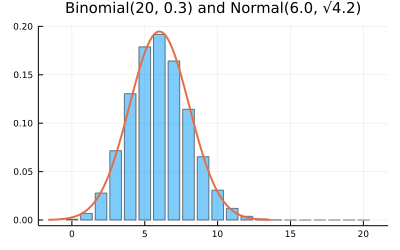

In [4]:
# 二項分布と正規分布を重ねて作画
bar(support(bin), x -> pdf(bin, x); alpha=0.5, label="")
plot!(normal; label="", lw=2)
title!("Binomial($n, $p) and Normal($μ, √$(round(σ²; digits=3)))")

In [5]:
# 以上の手続きを函数化
function plot_bin_normal(n, p; xlim=nothing, kwargs...)
    bin = Binomial(n, p)
    μ, σ² = n*p, n*p*(1-p)
    normal = Normal(μ, √σ²)
    if isnothing(xlim)
        xlim = (μ - 4√σ², μ + 4√σ²)
    end
    bar(support(bin), x -> pdf(bin, x); alpha=0.5, label="bin")
    plot!(normal; label="normal", lw=2)
    title!("Binomial($n, $p) and Normal($(round(μ; digits=3)), √$(round(σ²; digits=3)))")
    plot!(; xlim, kwargs)
end

plot_bin_normal (generic function with 1 method)

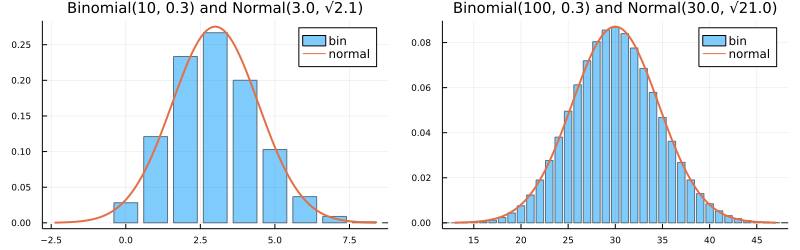

In [6]:
# 同時に2つのグラフをプロット
plot(plot_bin_normal(10, 0.3), plot_bin_normal(100, 0.3); size=(800, 250))

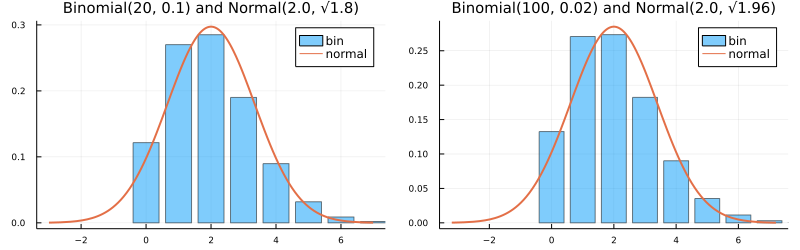

In [7]:
# np = 2 の場合は正規分布による近似の誤差が大きい.
plot(plot_bin_normal(20, 0.1), plot_bin_normal(100, 0.02); size=(800, 250))

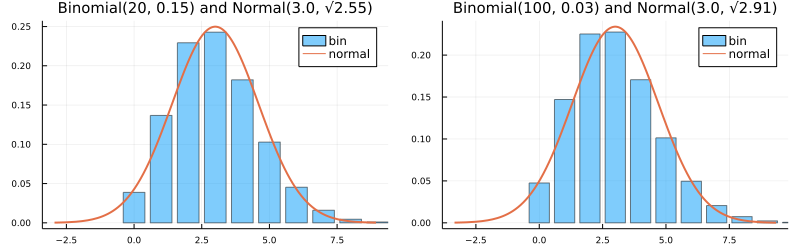

In [8]:
# np = 3
plot(plot_bin_normal(20, 0.15), plot_bin_normal(100, 0.03); size=(800, 250))

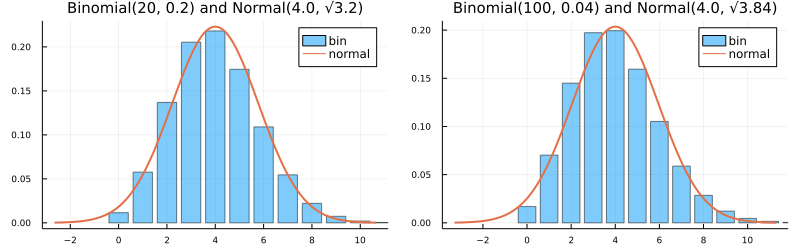

In [9]:
# np = 4
plot(plot_bin_normal(20, 0.2), plot_bin_normal(100, 0.04); size=(800, 250))

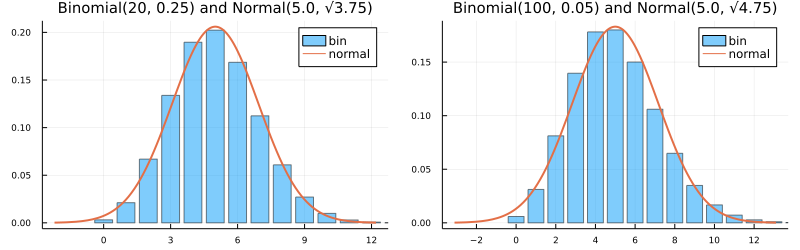

In [10]:
# np = 5
plot(plot_bin_normal(20, 0.25), plot_bin_normal(100, 0.05); size=(800, 250))

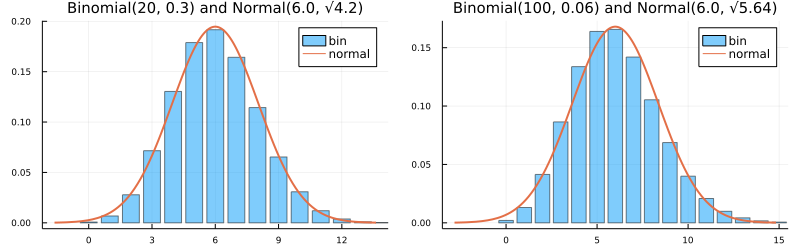

In [11]:
# np = 6
plot(plot_bin_normal(20, 0.3), plot_bin_normal(100, 0.06); size=(800, 250))

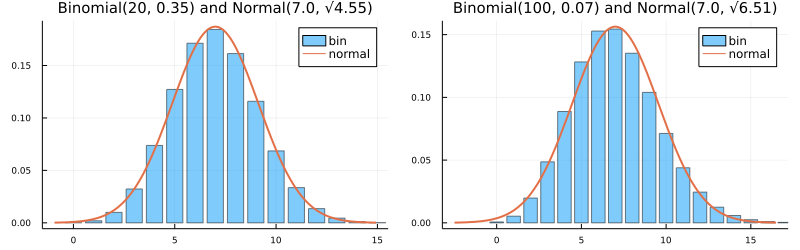

In [12]:
# np = 7
plot(plot_bin_normal(20, 0.35), plot_bin_normal(100, 0.07); size=(800, 250))

以上のように $np$ が小さな場合には中心極限定理による正規分布近似の誤差は大きくなる.  $p$ と $1-p$ の対称性より, $n(1-p)$ が小さな場合も同様である.

### npが小さな場合はPoisson分布で近似される

$np = \lambda > 0$ を一定にしたままで, $n\to\infty$ の極限を取ると,

$$
P(k|n,p=\lambda/n) =
\frac{n(n-1)\cdots(n-k+1)}{k!} \frac{\lambda^k}{n^k}
\underbrace{\left(1 - \frac{\lambda}{n}\right)^{n-k}}_{\to \exp(-\lambda)}
\to
e^{-\lambda}\frac{\lambda^k}{k!}.
$$

確率質量函数

$$
P(k|\lambda) = e^{-\lambda}\frac{\lambda^k}{k!} \quad (k=0,1,2,\ldots)
$$

で定義される $k$ に関する離散確率分布は __Poisson分布__ と呼ばれている.

このように $np=\lambda$ を一定の値に保ったままで, $n$ を大きくすると(同じことだが $p$ を小さくすると), 二項分布の極限として, Poisson分布が得られる.

例えば, 野球の強打者が一定期間の間にホームランを打つ本数の分布はPoisson分布で近似されると考えられる.

以上の状況における二項分布のPoisson分布近似を視覚化によって確認してみよう.

### npが小さな場合のPoisson分布による近似の視覚化

In [13]:
function plot_bin_poisson(n, p; xlim=nothing, kwargs...)
    bin = Binomial(n, p)
    λ = n*p
    poisson = Poisson(λ)
    if isnothing(xlim)
        xlim = (λ - 4√λ, λ + 4√λ)
    end
    bar(support(bin), x -> pdf(bin, x); alpha=0.5, label="bin")
    plot!(x -> mypdf(poisson, x); label="poisson", lw=2)
    title!("Binomial($n, $p) and Poisson($(round(λ; digits=3)))")
    plot!(; xlim, kwargs)
end

plot_bin_poisson (generic function with 1 method)

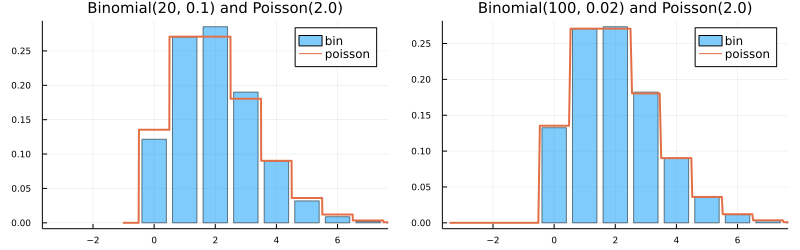

In [14]:
# np = 2
plot(plot_bin_poisson(20, 0.1), plot_bin_poisson(100, 0.02); size=(800, 250))

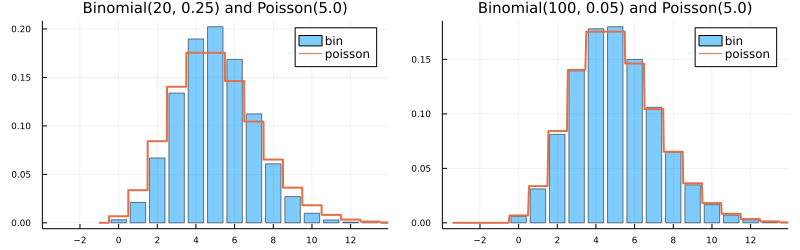

In [15]:
# np = 5
plot(plot_bin_poisson(20, 0.25), plot_bin_poisson(100, 0.05); size=(800, 250))

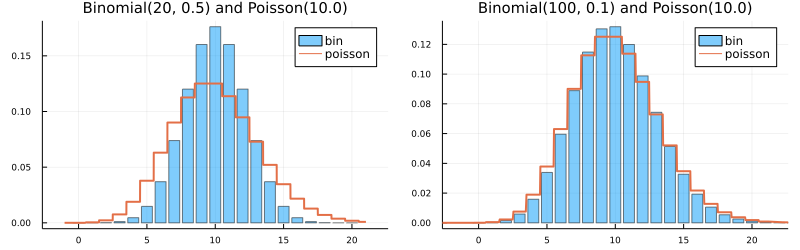

In [16]:
# np = 10
plot(plot_bin_poisson(20, 0.5), plot_bin_poisson(100, 0.1); size=(800, 250))

## P値と信頼区間の一般論

### P値の大雑把な定義

[『統計的有意性とP値に関するASA声明』日本語版 (2017)](http://www.biometrics.gr.jp/news/all/ASA.pdf) にも書いてあるように, __P値__ (P-value, p-value)の定義は大雑把に言って,
 
* 特定の統計モデル内で仮想的に生成されたデータの数値が現実で得られたデータの数値以上に極端な値になる確率またはその近似値

のことである.  この定義が確定するためには, 統計モデルだけではなく, 「より極端な値になる」ことの定義と必要に応じて近似計算法を与える必要がある.

__ポイント:__ 最重要キーワードは「統計モデル」である.

### P値の使い方

[『統計的有意性とP値に関するASA声明』日本語版 (2017)](http://www.biometrics.gr.jp/news/all/ASA.pdf) の原則1にあるように, P値は次のように利用される:

* P値は, 現実で得られらデータの数値とP値を計算するために用いた特定の統計モデルの整合性(consistency)または両立性(compatibility)の指標の1つである.

ただし, ASA声明(日本語版)では「矛盾する程度をしめす指標」と書かれている部分を別の言葉で言い直している.

P値の値が小さなほど整合性または両立性が低いとみなす.

__ポイント:__ この解釈の仕方であれば, 現実で得られたデータの数値が偏っている疑いがあっても, 使用した統計モデルが妥当でなくても, それらの整合性または両立性の指標としてP値は意味を持つことになる.  この点は統計学の実践的な利用では非常に重要で, 多くの場合に, 得られたデータの数値は偏っている可能性が排除できないし, 使用している統計モデルも妥当である保証が得られない.  そのような場合であっても, 得られたデータの数値と特定の統計モデルのあいだの整合性がどの程度であるかがわかると役に立つ場合がある.

__文献紹介:__ consisitencyやcompatibilityの指標としてP値を解釈すると良いことについては次の論文の説明が分かり易い:

* Valentin Amrhein, Sander Greenland.
<br>Discuss practical importance of results based on interval estimates and p-value functions, not only on point estimates and null p-values.
<br>First Published June 3, 2022.
<br>https://doi.org/10.1177%2F02683962221105904

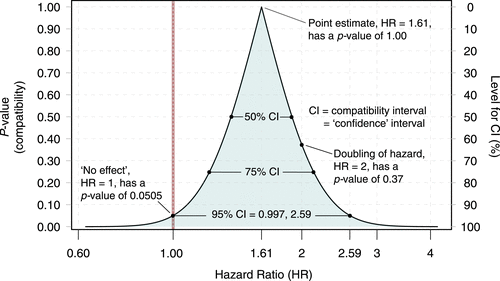

上の論文では上の図のように, CIとよく略される信頼区間(confidence interval)を __compatibility interval__ と改名することが提案されており, 次の文献でもそうなっている.

* Valentin Amrhein, Sander Greenland, and Blake McShane.
<br>Scientists rise up against statistical significance.
<br>Valentin Amrhein, Sander Greenland, Blake McShane and more than 800 signatories call for an end to hyped claims and the dismissal of possibly crucial effects.
<br>20 March 2019.
<br>https://doi.org/10.1038/d41586-019-00857-9

このnatureの記事は「統計的有意性」の科学的利用には弊害があるとして800人以上の科学者が反対を表明したことで有名であるが, P値や信頼区間の使用に反対しているわけではない.

### 信頼区間の定義

統計モデルがパラメータ $\theta$ を持っていると仮定し, 具体的な数値 $\theta_0$ が与えられていると仮定する.

このとき, データの数値 $x$ とパラメータを $\theta=\theta_0$ と設定して得られる統計モデルの確率分布を使って計算されたP値を「データの数値 $x$ に関する仮説 $\theta=\theta_0$ のP値」と呼び, 仮に次のように書くことにする:

$$
\pvalue(x|\theta=\theta_0).
$$

$0 \le \alpha \le 1$ と仮定する.

データの数値 $x$ に関するパラメータ $\theta$ の $100(1-\alpha)\%$ __信頼区間__ (confidence interval)が次のように定義される:

$$
\confint(x|\alpha) = \{\,\theta_0\mid \pvalue(x|\theta=\theta_0) \ge \alpha\,\}.
$$

すなわち, データの数値 $x$ に関するパラメータ $\theta$ の $100(1-\alpha)\%$ 信頼区間は, 仮説 $\theta=\theta_0$ のP値が $\alpha$ 以上になるようなパラメータ値 $\theta=\theta_0$ 全体の集合として定義される.

__注意:__ ここでは, 通常の入門的教科書にある信頼区間の定義と違って, P値を使って信頼区間を定義している.  しかし, P値(もしくは検定)と信頼区間が表裏一体であるという事実を使えば, 通常の入門的教科書にあるスタイルの信頼区間の導入の仕方と以上における信頼区間の定義の仕方は同等であることがわかる.  検定と信頼区間の表裏一体性に興味がある人は以下の文献を参照せよ:

* 竹内啓『数理統計学』p.103
* 竹村彰通『現代数理統計学』p.202
* 久保川達也『現代数理統計学の基礎』p.169
* 小針晛宏『確率・統計入門』p.197

__注意:__ $\alpha$ は __有意水準__ (significance level) と呼ばれ, $1-\alpha$ は __信頼度__ (confidence level) と呼ばれる. 「有意」や「信頼」という用語が使われていることを深刻に考えてはいけない. 単にそれらの用語が慣習的に用いられているので説明しておきたいと思っただけである.

### 信頼区間の解釈

P値の使い方より, データの数値 $x$ に関する仮説 $\theta=\theta_0$ のP値 $\pvalue(x|\theta=\theta_0)$ は

* データの数値 $x$ と統計モデル＋パラメータ値 $\theta=\theta_0$ の整合性または両立性の指標の1つ

とみなされる. 

そこに有意水準と呼ばれる閾値 $\alpha$ を設定し, 整合性または両立性の指標であるP値が $\alpha$ 未満になるとき, 

* 統計モデルの下で, データの数値 $x$ によって仮説 $\theta=\theta_0$ が有意水準 $\alpha$ で __棄却__ された

という.  これは, 

* 閾値 $\alpha$ によって, データの数値 $x$ と統計モデル＋仮説 $\theta=\theta_0$ の整合性が無さ過ぎる

と判断することを意味している.

一方, 信頼度 $1-\alpha$ の信頼区間の定義はP値が $\alpha$ 以上になるパラメータ値全体の集合であった.

このことから, データの数値 $x$ に関するパラメータ $\theta$ の $100(1-\alpha)\%$ 信頼区間は

* データの数値 $x$ から有意水準 $\alpha$ で棄却されないパラメータ値全体の集合

であり,

* 閾値 $\alpha$ によって, データの数値と整合性が無さ過ぎると判断されずに済むパラメータ値全体の集合

になる.

__注意:__ 以上の解釈の仕方であれば, データの数値 $x$ が何らかの理由で偏っていても, 統計モデルの選択が妥当でなくても, それらのあいだの整合性または両立性の様子を表す情報として信頼区間を利用することが可能になる. 

__注意:__ 実践的には, 信頼区間内の両端に非常に近いパラメータ値と信頼区間外の信頼区間の両端に非常に近いパラメータ値を明瞭に区別する必然性はない. 

__注意:__ 有意水準と呼ばれる閾値 $\alpha$ は慣習的に $5\%$ に設定されることがあるが, そのような慣習に科学的合理性はない.

__注意:__ 仮説 $\theta=\theta_0$ が棄却されたことは, 特定の統計モデルとP値の定義において, 特定のデータの数値から計算したP値が $\alpha$ 未満になったことを意味するに過ぎない.  多くの場合に, データの数値が偏っている可能性は排除できず, 統計モデルの妥当性も保証されない.  だから, 単に仮説 $\theta=\theta_0$ が棄却されたことだけから, 仮説 $\theta=\theta_0$ が科学的に否定されたかのように考えてはいけない.

__注意:__ [『統計的有意性とP値に関するASA声明』日本語版 (2017)](http://www.biometrics.gr.jp/news/all/ASA.pdf) を読めばわかるように, P値から得られる結論はささやかであり, 自信過剰になってはいけない.

### 有意水準と信頼度のモデル内確率としての解釈

以下において, $X$ はパラメータ値を $\theta=\theta_0$ と設定した統計モデルの確率分布に従う確率変数であるとする. ($X$ はモデル内でランダムに生成された仮想的なデータの数値だと解釈される.)

確率変数 $X$ に関わる確率を $P(\ )$ と書くことにする.

通常, P値は次の条件を満たすように定義する:

$$
P(\pvalue(X|\theta=\theta_0) < \alpha) \approx \alpha.
$$

この条件は次のように言い換えられる:

* パラメータ値を $\theta=\theta_0$ に設定した統計モデル内でランダムに生成された仮想的データ $X$ によって, 仮説 $\theta=\theta_0$ が有意水準 $\alpha$ で棄却される確率は有意水準 $\alpha$ で近似される.

データ $X$ から定まる $100(1-\alpha)\%$ 信頼区間の定義は, 有意水準 $\alpha$ で棄却されないようなパラメータ値 $\theta=\theta_0$ 全体の集合であった.  ゆえに,

$$
\begin{aligned}
P(\theta_0 \in \confint(X|\alpha)) &=
P(\pvalue(X|\theta=\theta_0) \ge \alpha) \\ &=
1 - P(\pvalue(X|\theta=\theta_0) < \alpha) \approx 1 - \alpha.
\end{aligned}
$$

これは次のように言い換えられる:

* パラメータ値を $\theta=\theta_0$ に設定した統計モデル内でランダムに生成された仮想的データ $X$ から計算されるパラメータ $\theta$ の $100(1-\alpha)\%$ 信頼区間に $\theta_0$ が含まれる確率は信頼度 $1-\alpha$ で近似される.

このように, 有意水準 $\alpha$ と信頼度 $1-\alpha$ はそれぞれP値に関するモデル内確率, 信頼区間に関するモデル内確率としての解釈がある.

__注意:__ この解釈は異なる設定での有意水準と信頼度を比較するためには重要だが, 個々のケースにおけるP値と信頼区間の解釈ではこのような考え方をするよりも, 整合性または両立性の様子を表すための道具だと思った方が分かり易い.

__注意:__ 有意水準と信頼度は統計分析の対象となる現実の母集団に関わる確率ではなく, 統計モデル内で定義された確率になっていることに注意せよ.  この点が不明瞭な解説はどれも不十分なので注意して欲しい. (多くの教科書でこの点が曖昧に説明されている.  モデルと現実の区別を曖昧にすることは典型的に非科学的な考え方なのでそれだと非常にまずい.)

## 二項分布モデルの場合

次のような設定を考える.

1. 当たりが出る確率が未知のルーレットを用意する.
2. ルーレットを $n$ 回まわして $k$ 回当たりが出たとする.
3. 「$n$ 回中 $k$ 回が当たり」というデータから, そのルーレットで当たりが出る確率について統計学的推論を行いたい.
4. そのための統計モデルとして, 以下で説明する二項分布を採用する.

以下では中心極限定理を用いた二項分布の正規分布近似を用いてP値と信頼区間を構成する.

### 標準正規分布の累積分布函数と分位点函数

標準正規分布の __累積分布函数__ (cumulative distribution function, cdf) を次のように書くことにする:

$$
p = \cdf(\Normal(0, 1), x) = \int_{-\infty}^x \frac{e^{-t^2/2}}{\sqrt{2\pi}}\,dt.
$$

これの逆函数を __分位点函数__ (quantile function)と呼び, 次のように表す:

$$
x = \quantile(\Normal(0, 1), p) \quad (0<p<1).
$$

これらの函数はコンピュータの基本特殊函数ライブラリによって効率的に実装されている.

### 標準正規分布の補累積分布函数

さらに, $1$ から累積分布函数を引いて得られる __補累積分布函数__ (complementary cumulative distribution function, ccdf)を次のように表すことにする:

$$
1 - p = \ccdf(\Normal(0, 1), x) = \int_x^\infty \frac{e^{-t^2/2}}{\sqrt{2\pi}}\,dt.
$$

次のグラフのピンク部分の面積はこれの値の例になっている.

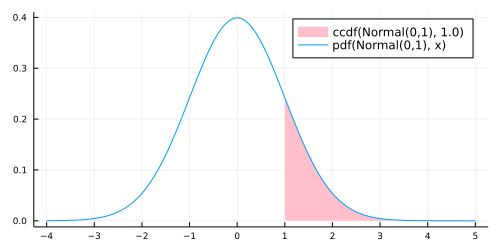

In [17]:
x = 1.0
plot(Normal(0, 1), x, 5; fillrange=0, la=0, fc=:pink, label="ccdf(Normal(0,1), $x)")
plot!(Normal(0, 1), -4, 5; label="pdf(Normal(0,1), x)", c=1)
plot!(xtick=-10:10)
plot!(size=(500, 250))

$\ccdf$ の2倍の値は次のグラフのピンク部分の面積になる.

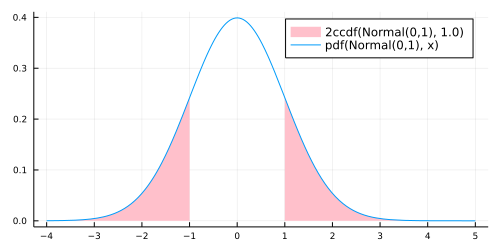

In [18]:
x = 1.0
plot(Normal(0, 1), x, 5; fillrange=0, la=0, fc=:pink, label="2ccdf(Normal(0,1), $x)")
plot!(Normal(0, 1), -4, -x; fillrange=0, la=0, fc=:pink, label="")
plot!(Normal(0, 1), -4, 5; label="pdf(Normal(0,1), x)", c=1)
plot!(xtick=-10:10)
plot!(size=(500, 250))

通常使われるのは両側検定のP値であり, 両側検定のP値はすぐ上のグラフのように両側の確率の和で定義される.

例えば, 

$$
\quantile(\Normal(0, 1), 1 - 0.05/2) = 1.959963984540 \approx 1.96 
$$

が成立している. 実用的にはこれは $1.96$ に等しいと考えてよい. どんぶり勘定する場合にはこれを $2$ だとみなして計算することもある.

In [19]:
quantile(Normal(0, 1), 1 - 0.05/2)

1.9599639845400576

$\quantile(\Normal(0, 1), 1 - 0.05/2) \approx 1.96$ は

$$
2\ccdf(\Normal(0, 1), 1.96) \approx 0.05
$$

が成立することを意味している.

In [20]:
2ccdf(Normal(0, 1), 1.96)

0.04999579029644087

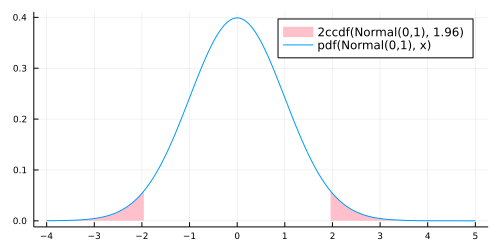

In [21]:
x = 1.96
plot(Normal(0, 1), x, 5; fillrange=0, la=0, fc=:pink, label="2ccdf(Normal(0,1), $x)")
plot!(Normal(0, 1), -4, -x; fillrange=0, la=0, fc=:pink, label="")
plot!(Normal(0, 1), -4, 5; label="pdf(Normal(0,1), x)", c=1)
plot!(xtick=-10:10)
plot!(size=(500, 250))

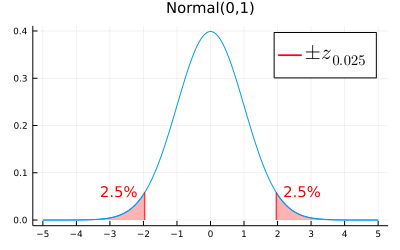

In [22]:
α = 0.05
z = quantile(Normal(), 1 - α/2)

var"z_{0.025}の定義" = plot()
plot!(Normal(), -5,  5; label="")
plot!(Normal(), -5, -z; label="", c=1, fillrange=0, fc=:red, fa=0.3)
plot!(Normal(),  z,  5; label="", c=1, fillrange=0, fc=:red, fa=0.3)
plot!([-z, -z, NaN, z, z],
    [0, pdf(Normal(), -z), NaN, 0, pdf(Normal(), z)];
    label="\$\\pm z_{0.025}\$", c=:red)
title!("Normal(0,1)"; xtick=-10:10)
annotate!(-2.2, 0.06, text("2.5%", 10, :red, :right))
annotate!( 2.2, 0.06, text("2.5%", 10, :red, :left))
plot!(; legendfontsize=14)

### Waldの信頼区間に対応するP値函数

二項分布の正規分布近似を使ったP値の定義の仕方には少なくとも二種類ある. 

この節では近似が粗い方の __Waldの信頼区間__ に対応するP値函数を扱う. その定義は次の通り.

$$
\begin{aligned}
\pvalue_{\wald}(k|n, p=p_0) &=
2\ccdf\left(\Normal(0,1),\, \left|\frac{k - np_0}{\sqrt{n\phat(1-\phat)}}\right|\right)
\\ &=
2\ccdf\left(\Normal(0,1),\, \left|\frac{\phat - p_0}{\sqrt{\phat(1-\phat)/n}}\right|\right).
\end{aligned}
$$

ここで

$$
\phat = \frac{k}{n}.
$$

とおいた. $\phat$ は「$n$ 回中 $k$ 回当たり」というデータの数値を用いた「当たりの確率」の点推定値である.

上のP値函数を以下では __WaldのP値函数__ と呼ぶことにする.

__どこで近似が粗くなっているか:__ 分母の平方根の内側の $n\phat(1-\phat)$ の $\phat$ は $p$ の点推定値である.  しかし, 試行回数 $n$, 成功確率パラメータ $p=p_0$ の二項分布の分散は $np_0(1-p_0)$ であることが分かっているので, この場合に分散の値を $n\phat(1-\phat)$ によって推定する必要はない.  そのせいで, WaldのP値函数による統計分析の誤差は大きくなってしまう場合が出て来る.

__近似を粗くすることのメリット:__ WaldのP値函数のメリットは対応する信頼区間の計算が容易になることである.

$0\le \alpha\le 1$ と仮定する(有意水準 $\alpha$ と信頼度 $1-\alpha$ の設定).

このとき, 上のP値函数に対応する $p$ の $100(1-\alpha)\%$ 信頼区間は次のように定義される:

$$
\confint_{\wald}(k|n,\alpha) =
\{\, p = p_0 \mid \pvalue_{\wald}(k|n, p=p_0) \ge \alpha \,\}.
$$

$\ccdf = 1 - \cdf$ であることと, $\cdf$ の逆函数が $\quantile$ であることより,

$$
z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2)
$$

とおくと,  $\phat = k/n$ であったことより,

$$
\begin{aligned}
\pvalue_{\wald}(k|n, p=p_0) \ge \alpha
&\iff
\left|\frac{p_0 - \phat}{\sqrt{\phat(1-\phat)/n}}\right| \le z_{\alpha/2}
\\ &\iff
\phat - z_{\alpha/2}\sqrt{\frac{\phat(1-\phat)}{n}}
\le p_0 \le
\phat + z_{\alpha/2}\sqrt{\frac{\phat(1-\phat)}{n}}.
\end{aligned}
$$

ゆえに, 

$$
\confint_{\wald}(k|n,\alpha) =
\left[
\phat - z_{\alpha/2}\sqrt{\frac{\phat(1-\phat)}{n}},\;
\phat + z_{\alpha/2}\sqrt{\frac{\phat(1-\phat)}{n}}
\right].
$$

これを __Waldの信頼区間__ と呼ぶ.

__注意:__ Waldの信頼区間は区間 $[0,1]$ の範囲をはみ出すことがある.

### WaldのP値と信頼区間の計算問題

(1) 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する仮説 $p=1/3$ のWaldのP値を求めよ.

(2) 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する仮説 $p=0.4$ のWaldのP値を求めよ.

(3) 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する当たりの確率 $p$ のWaldの $95\%$ 信頼区間を求めよ.

浮動小数点数による数値計算で求めよ. おおよそ正しい値が求まっていれば正解とする. 

__「おおよそ」の意味:__ 例えば, 相対誤差 $0.5\%$ で求めよ. 真の値が $a > 0$ のときその近似値 $b > 0$ の相対誤差を $|b/a - 1|$ で定義しておく.

### WaldのP値と信頼区間の計算問題の解答例

(1) $0.467 = 46.7\%$

(2) $0.0291 = 2.91\%$

(3) $[0.2102, 0.3898]$

In [23]:
# 問題の設定 (α は \alpha TABで入力できる)
n, k, α = 100, 30, 0.05

(100, 30, 0.05)

In [24]:
# (1)の解答 (p̂ は p\hat TAB で, p₀ は p\_0 TABで入力可能)
p = p₀ = 1/3
p̂ = k/n
sehat = √(p̂*(1-p̂)/n)
pval = 2ccdf(Normal(0, 1), abs(p̂ - p₀)/sehat)
@show pval;

pval = 0.46698526134678425


In [25]:
# (2)の解答 (p̂ は p\hat TAB で, p₀ は p\_0 TABで入力可能)
p = p₀ = 0.4
p̂ = k/n
sehat = √(p̂*(1-p̂)/n)
pval = 2ccdf(Normal(0, 1), abs(p̂ - p₀)/sehat)
@show pval;

pval = 0.02909633174125216


In [26]:
# (3)の解答
# 次の行は z = 1.96 としてもよい.
z = quantile(Normal(0, 1), 1 - α/2)
p_L, p_U = p̂ - z*sehat, p̂ + z*sehat
@show [p_L, p_U];

[p_L, p_U] = [0.21018316681457927, 0.3898168331854207]


### WaldのP値函数と信頼区間の実装例

In [27]:
# WaldのP値函数と信頼区間の実装例

function pvalue_wald(n, k, p)
    p̂ = k/n
    SEhat = √(p̂*(1-p̂)/n)
    2ccdf(Normal(), abs(p̂ - p)/SEhat)
end

function confint_wald(n, k; α = 0.05)
    p̂ = k/n
    SEhat = √(p̂*(1-p̂)/n)
    z = quantile(Normal(), 1-α/2)
    p_L = p̂ - z*SEhat
    p_U = p̂ + z*SEhat
    [p_L, p_U]
end

confint_wald (generic function with 1 method)

### Waldの信頼区間の視覚化の例

有意水準が $\alpha=0.05=5\%$ のときの, 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する当たりの確率 $p$ のWaldの $95\%$ 信頼区間を求め, それを図示してみよう.

一般にこのような仕事をしようとすると, 計算のためのコードよりも, グラフのプロットのためのコードの分量が膨れ上がる.

In [28]:
# 信頼区間の計算

n, k, α = 100, 30, 0.05
kmin, kmax = 0, 65
p_L, p_U = confint_wald(n, k; α)
@show [p_L, p_U];

[p_L, p_U] = [0.21018316681457927, 0.3898168331854207]


In [29]:
# 視覚化の準備0

dist_L, dist_U = Binomial(n, p_L), Binomial(n, p_U)
p̂ = k/n
normal_L = Normal(n*p_L, √(n*p̂*(1-p̂)))
normal_U = Normal(n*p_U, √(n*p̂*(1-p̂)))
k_L, k_U = 2n*p_L - k, 2n*p_U - k
cdf_L, ccdf_L = cdf(normal_L, k_L), ccdf(normal_L, k)
cdf_U, ccdf_U = cdf(normal_U, k), ccdf(normal_U, k_U);

In [30]:
# 視覚化の準備1

var"Wald: 下側では p = p_L がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_L, i), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, kmax+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))
title!("Binomial(n=$n, p=p_L),  p_L=$(round(p_L; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
plot!(; ylim=(-0.007, 0.105));

In [31]:
# 視覚化の準備2

var"Wald: 上側では p = p_U がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_U, i), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), kmin-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))
title!("Binomial(n=$n, p=p_U),  p_U=$(round(p_U; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_U]; label="n p_L = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!(; ylim=(-0.007, 0.105));

In [32]:
# 視覚化の準備3

var"Wald: n × 95%信頼区間" = plot(; size=(500, 300))

plot!(i -> mypdf(dist_L, i), kmin-0.5, 47+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, 47+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))

plot!(i -> mypdf(dist_U, i), 15-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), 15-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))

vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
vline!([n*p_U]; label="n p_U = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!([n*p_L, n*p_U], fill(-0.003, 2); label="", c=:red, lw=5)
title!("n = $n,  [n p_L, n p_U] = [$(round(n*p_L; digits=2)), $(round(n*p_U; digits=2))]")
plot!(; ylim=(-0.007, 0.105));

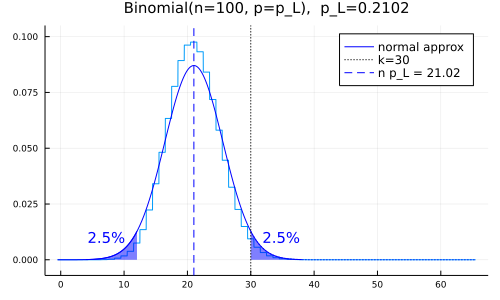

In [33]:
var"Wald: 下側では p = p_L がぎりぎり"

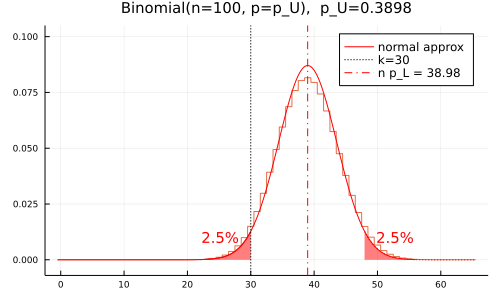

In [34]:
var"Wald: 上側では p = p_U がぎりぎり"

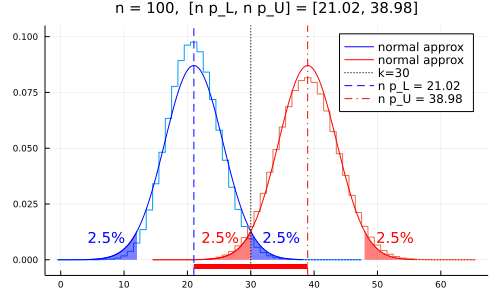

In [35]:
var"Wald: n × 95%信頼区間"

 ### Wilsonの信頼区間に対応するP値函数
 
  __Wilsonの信頼区間__ に対応するP値函数はWaldのP値函数の定義において分散を推定していたことを止めることによって自然に定義される:
  
$$

\begin{aligned}
\pvalue_{\wilson}(k|n, p=p_0) &=
2\ccdf\left(\Normal(0,1),\, \left|\frac{k - np_0}{\sqrt{np_0(1-p_0)}}\right| \le z = z_{\alpha/2}\right)
\\ &=
2\ccdf\left(\Normal(0,1),\, \left|\frac{\phat - p_0}{\sqrt{p_0(1-p_0)/n}}\right| \le z = z_{\alpha/2}\right).
\end{aligned}
$$

このP値函数を __WilsonのP値函数__ と呼ぶことにする.

$0\le \alpha\le 1$ と仮定する(有意水準 $\alpha$ と信頼度 $1-\alpha$ の設定).

上のP値函数に対応する $p$ の $100(1-\alpha)\%$ 信頼区間は次のように定義される:

$$
\confint_{\wilson}(k|n,\alpha) =
\{\, p = p_0 \mid \pvalue_{\wilson}(k|n, p=p_0) \ge \alpha \,\}.
$$

このとき,

$$
z = z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2)
$$

とおくと, 前節と同様にして,

$$
\begin{aligned}
\pvalue_{\wilson}(k|n, p=p_0) \ge \alpha
&\iff
\left|\frac{\phat - p_0}{\sqrt{p_0(1-p_0)/n}}\right| \le z = z_{\alpha/2}
\\ &\iff
\left(p_0 - \phat\right)^2 \le \frac{z^2}{n}p_0(1-p_0)
\\ &\iff
\left(1 + \frac{z^2}{n}\right)p_0^2 - 2\left(\phat + \frac{z^2}{2n}\right)p_0 + \phat^2 \le 0.
\end{aligned}
$$

これは $p_0$ に関する二次不等式である. ゆえに, 不等号を等号にして得られる $p_0$ に関する二次方程式の解を小さな順に $p_-$, $p_+$ と書くと, 

$$
\confint_{\wilson}(k|n,\alpha) = [p_-, p_+].
$$

これを __Wilsonの信頼区間__ と呼ぶ.

Wilsonの信頼区間を計算するためには二次方程式を解かなければいけないので, 少し面倒になる.

しかし, Wilsonの信頼区間は良い性質を持つことが知られている.

__文献:__ Wilsonの信頼区間が良い良い性質を持つことについては次の論文を参照せよ.

* Alan Agresti and Brent A. Coull.
<br>Approximate is Better than “Exact” for Interval Estimation of Binomial Proportions.
<br>American Statistician, Volume 52, 1998, Issue 2, 119-126.
<br>https://doi.org/10.1080/00031305.1998.10480550
<br>https://scholar.google.co.jp/scholar?cluster=5129299358902170657

__注意:__ $p_\pm$ は以下のようにして求めることができる:

$$
a = 1 + \frac{z^2}{n}, \quad
b = \phat + \frac{z^2}{2n}, \quad
c = \phat^2
$$

のとき,

$$
p_\pm = \frac{b \pm \sqrt{b^2-ac}}{a}.
$$

$ap_0^2 - 2bp_0 + c$ の $p_0=0,1$ での値はそれぞれ $\phat^2\ge 0$, $(1-\phat)^2\ge 0$ となるので, $0\le p_-\le p_+\le 1$ が成立する.  すなわち, Wilsonの信頼区間は区間 $[0,1]$ の範囲をはみ出さない.

### WilsonのP値と信頼区間の計算問題

(1) 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する仮説 $p=1/3$ のWilsonのP値を求めよ.

(2) 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する仮説 $p=0.4$ のWilsonのP値を求めよ.

(3) 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する当たりの確率 $p$ のWilsonの $95\%$ 信頼区間を求めよ.

どちらも浮動小数点数による数値計算で求めよ. おおよそ正しい値が求まっていれば正解とする. 

__「おおよそ」の意味:__ 例えば, 相対誤差 $0.5\%$ で求めよ. 真の値が $a > 0$ のときその近似値 $b > 0$ の相対誤差を $|b/a - 1|$ で定義しておく.

### WilsonのP値と信頼区間の計算問題の解答例

(1) $0.480 = 48.0\%$

(2) $0.0412 = 4.12\%$

(3) $[0.2189, 0.3958]$

In [36]:
# 問題の設定 (α は \alpha TABで入力できる)
n, k, α = 100, 30, 0.05

(100, 30, 0.05)

In [37]:
# (1)の解答 (p̂ は p\hat TAB で, p₀ は p\_0 TABで入力可能)
p = p₀ = 1/3
p̂ = k/n
sehat = √(p₀*(1-p₀)/n)
pval = 2ccdf(Normal(0, 1), abs(p̂ - p₀)/sehat)
@show pval;

pval = 0.47950012218695354


In [38]:
# (2)の解答 (p̂ は p\hat TAB で, p₀ は p\_0 TABで入力可能)
p = p₀ = 0.4
p̂ = k/n
sehat = √(p₀*(1-p₀)/n)
pval = 2ccdf(Normal(0, 1), abs(p̂ - p₀)/sehat)
@show pval;

pval = 0.04122683333716358


In [39]:
# (3)の解答
# 次の行は z = 1.96 としてもよい.
z = quantile(Normal(0, 1), 1 - α/2)
a, b, c = 1 + z^2/n, p̂ + z^2/(2n), p̂^2
p_L, p_U = (b - √(b^2 - a*c))/a, (b + √(b^2 - a*c))/a
@show [p_L, p_U];

[p_L, p_U] = [0.2189488529493274, 0.395848546333467]


### WaldのP値函数と信頼区間の実装例

In [40]:
# WilsonのP値函数と信頼区間の実装例

function pvalue_wilson(n, k, p)
    p̂ = k/n
    SE = √(p*(1-p)/n)
    2ccdf(Normal(), abs(p̂ - p)/SE)
end

function confint_wilson(n, k; α = 0.05)
    p̂ = k/n
    z = quantile(Normal(0, 1), 1-α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

confint_wilson (generic function with 1 method)

### Wilsonの信頼区間の視覚化の例

有意水準が $\alpha=0.05=5\%$ のときの, 「$n=100$ 回中 $k=30$ 回当たり」というデータの数値に関する当たりの確率 $p$ のWilsonの $95\%$ 信頼区間を求め, それを図示してみよう.

In [41]:
# 信頼区間の計算

n, k, α = 100, 30, 0.05
kmin, kmax = 0, 65
p_L, p_U = confint_wilson(n, k; α)
@show [p_L, p_U];

[p_L, p_U] = [0.2189488529493274, 0.395848546333467]


In [42]:
# 視覚化の準備0

dist_L, dist_U = Binomial(n, p_L), Binomial(n, p_U)
normal_L = Normal(n*p_L, √(n*p_L*(1-p_L)))
normal_U = Normal(n*p_U, √(n*p_U*(1-p_U)))
k_L, k_U = 2n*p_L - k, 2n*p_U - k
cdf_L, ccdf_L = cdf(normal_L, k_L), ccdf(normal_L, k)
cdf_U, ccdf_U = cdf(normal_U, k), ccdf(normal_U, k_U);

In [43]:
# 視覚化の準備1

var"Wilson: 下側では p = p_L がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_L, i), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, kmax+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))
title!("Binomial(n=$n, p=p_L),  p_L=$(round(p_L; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
plot!(; ylim=(-0.007, 0.105));

In [44]:
# 視覚化の準備2

var"Wilson: 上側では p = p_U がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_U, i), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), kmin-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))
title!("Binomial(n=$n, p=p_U),  p_U=$(round(p_U; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_U]; label="n p_L = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!(; ylim=(-0.007, 0.105));

In [45]:
# 視覚化の準備3

var"Wilson: n × 95%信頼区間" = plot(; size=(500, 300))

plot!(i -> mypdf(dist_L, i), kmin-0.5, 47+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, 47+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))

plot!(i -> mypdf(dist_U, i), 15-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), 15-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))

vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
vline!([n*p_U]; label="n p_U = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!([n*p_L, n*p_U], fill(-0.003, 2); label="", c=:red, lw=5)
title!("n = $n,  [n p_L, n p_U] = [$(round(n*p_L; digits=2)), $(round(n*p_U; digits=2))]")
plot!(; ylim=(-0.007, 0.105));

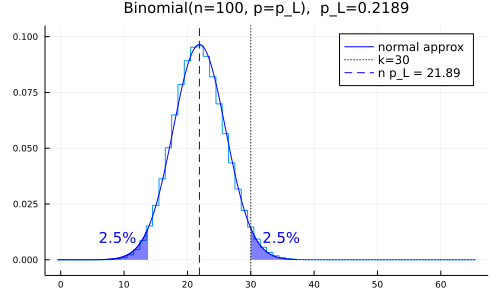

In [46]:
var"Wilson: 下側では p = p_L がぎりぎり"

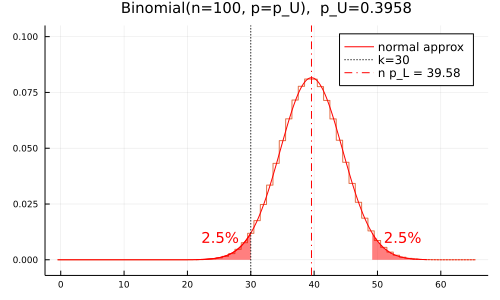

In [47]:
var"Wilson: 上側では p = p_U がぎりぎり"

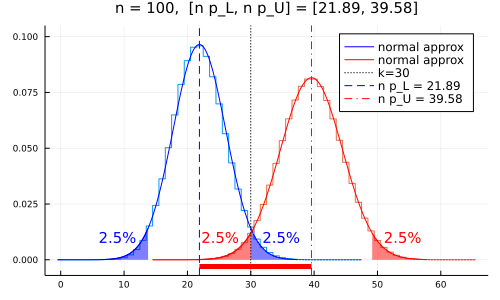

In [48]:
var"Wilson: n × 95%信頼区間"

すぐ上のWilsonの信頼区間の図と以下のWaldの信頼区間の図を比較すると, Waldの信頼区間では「$n$ 回中 $k$ 回当たり」というデータの数値から二項分布の分散を推定しているせいで, 実際の分散からずれてしまうことがわかる.

しかし, $95\%$ 信頼区間を見ると, Wilson版が $[0.2189, 0.3958]$ でWald版が $[0.2102, 0.3889]$ なので少しの違いしかない.  このように, 誤差が大きいと言われるWaldの信頼区間であっても, 使いどころを間違えなければ, 十分な精度を得ることができる.

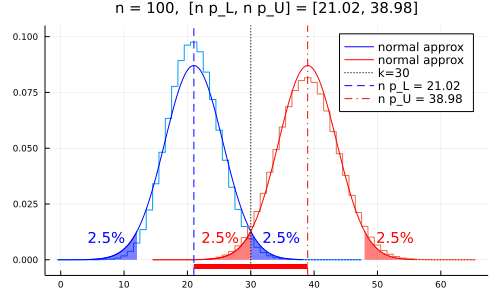

In [49]:
var"Wald: n × 95%信頼区間"

### P値と信頼区間の解釈に関する問題(1)

数学的な説明が長く続いたので, どういう設定になっていたかを思い出そう. 我々は, 

* 当たりが出る確率が未知のルーレットを $n$ 回まわして出た当たりの回数を $k$ とし, 
* 統計モデルとして二項分布を採用し, 
* 二項分布の正規分布近似を用いて, P値と信頼区間を定義して, 

ルーレットで当たりが出る確率について統計学的推論を行えるようにしたのであった.

以上で扱った「$n=100$ 回中 $k=30$ 回当たり」というデータが得られた場合の計算結果はどのように解釈すればよいのだろうか? 有意水準を $\alpha = 5\%$ に設定してあったという前提のもとで, 以下の問いに答えよ.

ルーレットの製作者は「このルーレットでは当たりが出る確率は $1/3$ になるはずだ」と言った. 

「当たりが出る確率は $1/3$ である」という仮説のP値は, Wald版が $46.7\%$ になり, Wilson版は $48.0\%$ になり, どちらも有意水準 $5\%$ を大幅に上回っている.

ゆえに, 「$n=100$ 回中 $k=30$ 回当たり」というデータによって, 「当たりが出る確率は $1/3$ である」という仮説は有意水準 $5\%$ で棄却されない.

$95\%$ 信頼区間も, Wald版は $[0.2102, 0.3889]$ で, Wilson版は $[0.2189, 0.3958]$ で, どちらも $1/3$ を含んでいる.

これを理由に「このルーレットでは当たりが出る確率は $1/3$ になるはずだ」というルーレット製作者の主張は科学的に正しいことが確認されたと考えてもよいか?

### P値と信頼区間の解釈に関する問題(1)解答例

この程度のことで, 「このルーレットでは当たりが出る確率は $1/3$ になるはずだ」というルーレット製作者の主張が科学的に正しいことが確認されたと考えてはいけない.

大きめのP値は単に, $p=1/3$ の二項分布と「$n=100$ 回中 $k=30$ 回」というデータの整合性(または両立性)が高いことを意味するに過ぎない.

ルーレットで当たりが出る確率がどれだけ $1/3$ に近いかについては, もっと大量にデータを集めないと十分にわからないだろう. 実際, 信頼区間の幅はまだかなり広いように見える.

しかし, 「このルーレットでは当たりが出る確率は $1/3$ になるはずだ」というルーレット製作者の主張が無根拠ではなさそうであるという感触が得られたと考える程度であれば問題ないだろう.

### P値と信頼区間の解釈に関する問題(2)

この問題では, 有意水準は $\alpha=5\%$ で, 「$n=100$ 回中 $k=30$ 回当たり」というデータが得られたときに, ルーレットの製作者は「このルーレットでは当たりが出る確率は $0.4$ になるはずだ」と言ったという設定を採用する. 

このとき, 「当たりが出る確率は $0.4$ である」という仮説のP値は, Wald版が $2.91\%$ になり, Wilson版は $4.12\%$ になり, どちらも有意水準 $5\%$ 未満になっている.

ゆえに, 「$n=100$ 回中 $k=30$ 回当たり」というデータによって, 「当たりが出る確率は $0.4$ である」という仮説は有意水準 $5\%$ で棄却される.

$95\%$ 信頼区間も, Wald版は $[0.2102, 0.3889]$ で, Wilson版は $[0.2189, 0.3958]$ で, どちらも $0.4$ を含まない.

これを理由に「このルーレットでは当たりが出る確率は $0.4$ になるはずだ」というルーレット製作者の主張は科学的に否定されたと考えてもよいか?

### P値と信頼区間の解釈に関する問題(2)の解答例

「このルーレットでは当たりが出る確率は $0.4$ になるはずだ」というルーレット製作者の主張は科学的に否定されたと考えてはいけない.

我々が計算したP値に関する結果は, 成功確率を $p=0.4$ に設定した二項分布モデル内では, 「$n=100$ 回中 $k=30$ 回当たり」という観測データ以上に極端な数値が生成される確率の近似値が $2.91\%$ になったり, $4.12\%$ になったりすることを意味するに過ぎない.

これは, ルーレットへの二項分布モデルの適用が妥当でかつ, ルーレットの製作者が主張する「当たりが出る確率は $0.4$ である」という主張が正しくても, 「$n=100$ 回中 $k=30$ 回当たり」以上に偏ったデータが得られる確率は $2.91\%$ から $4.12\%$ 程度もあることを意味している.

例えば, データの数値を得るときに数え間違えがあって, 実際には $k=31$ 回当たりが出ていたとすると, $p=0.4$ のP値は, Wald版が $5.17\%$ になり, Wilson版が $6.62\%$ になり, パラメータ $p$ の$95\%$ 信頼区間は, Wald版が $[0.2194, 0.4006]$ になり, Wilson版が $[0.2278, 0.4063]$ になる.

In [50]:
@show pvalue_wald(100, 31, 0.4)
@show pvalue_wilson(100, 31, 0.4);

pvalue_wald(100, 31, 0.4) = 0.051657817773735695
pvalue_wilson(100, 31, 0.4) = 0.06619257972219329


In [51]:
@show confint_wald(100, 31; α = 0.05)
@show confint_wilson(100, 31; α =0.05);

confint_wald(100, 31; α = 0.05) = [0.2193529900246855, 0.4006470099753145]
confint_wilson(100, 31; α = 0.05) = [0.22779697212376024, 0.40626055719489446]


ゆえに, この程度の証拠でルーレット製作者の主張が科学的に否定されたことにしまうのは不合理であろう.

しかし, P値が $5\%$ を切っていることから, ルーレット製作者の主張が誤りである可能性を疑うことは十分に許されるだろう.

ルーレットの製作者が納得できる形で再検査してみるべきだと思われる.

### P値函数と信頼区間の関係の視覚化

「$n$ 回中 $k$ 回当たり」というデータの数値が得られたとき, パラメータ $p$ の函数

$$
p_0 \mapsto \pvalue(k|n, p=p_0)
$$

という函数が得られる($\pvalue$ は $\pvalue_{\wald}$ または $\pvalue_{\wilson}$).  この函数をデータの数値が定める __P値函数__ (P-value function) と呼ぶ.

パラメータ $p$ の信頼度 $1-\alpha$ の __信頼区間__ (confidence interval)は, このP値函数のグラフの高さ $\alpha$ での切断になる.

以下で示すグラフを見よ.

In [52]:
# P値函数と信頼区間を同時プロット

function plot_binom_pvalue_and_confint(
        pvalfunc, cifunc, n, k;
        α = 0.05, name = "", size=(600, 360), kwargs...)
    p_L, p_U = ci = cifunc(n, k; α)
    plot(p -> pvalfunc(n, k, p), 0, 1;
        label="P-value function", c=1)
    hline!([α]; label="significance level", c=:red, ls=:dot, lw=1.5)
    plot!(ci, fill(α, 2); label="confidence interval", c=:red, lw=4)
    vline!([p_L]; label="p_L", c=2, ls=:dash)
    vline!([p_U]; label="p_U", c=3, ls=:dashdot)
    plot!(; xtick=0:0.1:1, ytick=0:0.05:1, tickfontsize=7)
    plot!(; xguide="success rate parameter p", yguide="P-value")
    plot!(; legendfontsize=9)
    title!("$(name)data = (n,k) = ($n,$k), significance level = α = $α")
    plot!(; size, kwargs...)
end

plot_binom_pvalue_and_confint (generic function with 1 method)

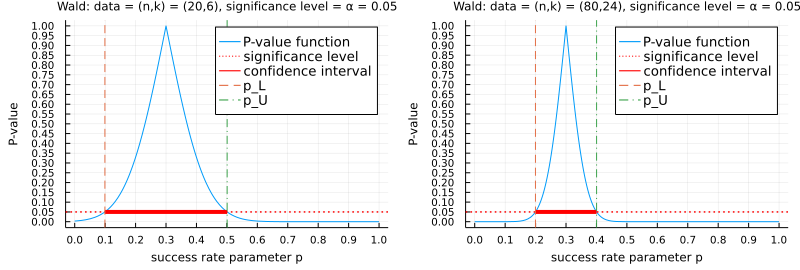

In [53]:
P1 = plot_binom_pvalue_and_confint(
    pvalue_wald, confint_wald, 20, 6; name = "Wald: ")

P2 = plot_binom_pvalue_and_confint(
    pvalue_wald, confint_wald, 80, 24; name = "Wald: ")

plot(P1, P2; size=(800, 270), titlefontsize=8,
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)

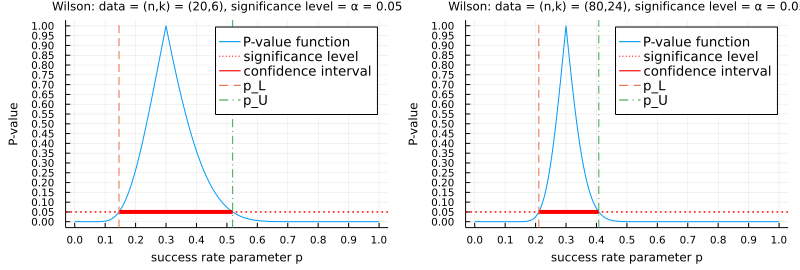

In [54]:
P1 = plot_binom_pvalue_and_confint(
    pvalue_wilson, confint_wilson, 20, 6; name = "Wilson: ")

P2 = plot_binom_pvalue_and_confint(
    pvalue_wilson, confint_wilson, 80, 24; name = "Wilson: ")

plot(P1, P2; size=(800, 270), titlefontsize=8,
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)

* P値函数はモデルのパラメータとデータの数値の整合性の指標のグラフである.
* P値函数は「とんがり帽子」型になる.
* 信頼区間の幅は大雑把にその「とんがり帽子」の幅になる.
* 標本サイズ $n$ が $a$ 倍になるとその幅は大体 $\sqrt{a}$ 倍になる.
* 例えば区間推定の精度を1桁上げるためには, 標本サイズを100倍にする必要がある.